# Kent Seslerinin Sınıflandırılması

In [1]:
import os

In [2]:
from google.colab import drive

In [3]:
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
os.chdir("/content/drive/My Drive")

## 0. Veri Setinin İncelenmesi

a. “UrbanSounds8K” veri setini bilgisayarınıza indirin. (5,6 GB)
https://urbansounddataset.weebly.com/urbansound8k.html

b. İndirdiğiniz .tar dosyasını açın. (Mentorlarınızdan destek alabilirsiniz )

c. README dosyasını okuyarak elimizdeki verinin ne olduğunu ve nasıl
isimlendirildiğini iyice anlayın.

In [5]:
!ls

 34r3f				    f312hh92		  Untitled0.ipynb
 app1.ipynb			    geemap_folium.ipynb   Untitled1.ipynb
'Colab Notebooks'		    ist.html		  Untitled2.ipynb
 coursera			    nighttime.ipynb	  UrbanSound8K
 coursera_deep_learning		    raster		  UrbanSound8K.tar.gz
 download_daytime_satellite.ipynb   resim4.png		  voiceimages


In [6]:
import pandas as pd

In [7]:
data=pd.read_csv("/content/drive/My Drive/UrbanSound8K/metadata/UrbanSound8K.csv")
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [8]:
import matplotlib.pyplot as plt

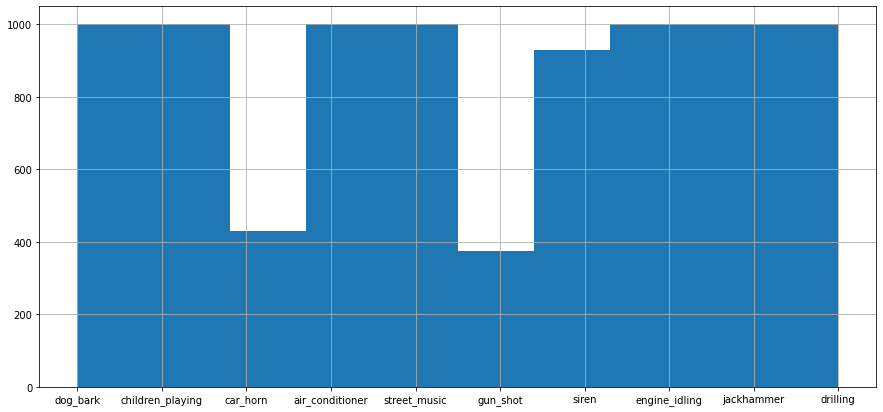

In [9]:
plt.figure(figsize=(15,7))
data["class"].hist()

In [ ]:
!tar -xvf UrbanSound8K.tar.gz

In [10]:
import librosa
import librosa.display

In [11]:
import numpy as np

In [12]:
def create_spectrogram(y):
  spec= librosa.feature.melspectrogram(y=y)
  spec_conv=librosa.amplitude_to_db(spec, ref=np.max)
  return spec_conv

In [ ]:
os.mkdir("/content/drive/My Drive/voiceimages")
for etiket in range(10):
  os.mkdir("/content/drive/My Drive/voiceimages"+"/"+str(etiket))

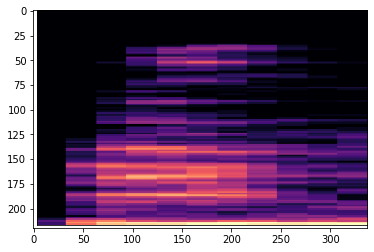

In [14]:
ses, sr = librosa.load("/content/drive/My Drive/UrbanSound8K/audio/fold2/4201-3-0-0.wav")
ses=create_spectrogram(ses)
librosa.display.specshow(ses, sr= sr)
plt.savefig("/content/drive/My Drive/resim4.png", pad_inches = 0, bbox_inches = 'tight')
plt.close()

ornek_resim= plt.imread("/content/drive/My Drive/resim4.png")
plt.imshow(ornek_resim)
plt.show()

In [16]:
for fold in range(1,11):
  fold_iter="/content/drive/My Drive/UrbanSound8K/audio/fold"+str(fold)

  for ses_dosyasi in os.listdir(fold_iter):
    if ses_dosyasi.endswith(".wav"):
        ses_isim=ses_dosyasi.split(".")[0]

        ses_etiket=ses_dosyasi.split("-")[1]

        audio, sr = librosa.load(fold_iter + "/" + ses_dosyasi)
        spec=create_spectrogram(audio)
        librosa.display.specshow(spec, sr= sr)
        plt.savefig("/content/drive/My Drive/voiceimages/"+ses_etiket+"/"+ses_isim+".png", pad_inches = 0, bbox_inches = 'tight')
        plt.close()

## 2. Önişleme - Notebook
a. Görüntüleri (spectrogramları) sırasıyla okuyarak, grayscale dönüşümü, resizing ve normalizasyon yapın.

b. Görüntüleri ait oldukları etiketlerle birlikte, [görüntü, etiket] formatında bir listeye ekleyin.

c. Bu listeyi kullanarak, X_train, y_train, X_val, y_val, X_test ve y_test veri setlerini oluşturun.

d. Bu veri setlerini bilgisayarınıza kaydedin.


In [17]:
import cv2

If you are enlarging the image, you should prefer to use INTER_LINEAR or INTER_CUBIC interpolation. If you are shrinking the image, you should prefer to use INTER_AREA interpolation.

Link: https://stackoverflow.com/questions/23853632/which-kind-of-interpolation-best-for-resizing-image

In [18]:
import random

In [19]:
imgs= []
labels= []

In [20]:
for etiket in range(10):
  img_array=os.listdir("/content/drive/My Drive/voiceimages/"+str(etiket))  

  for img_iter in range(len(img_array)):
    img_gray=cv2.imread("/content/drive/My Drive/voiceimages/"+str(etiket)+"/"+img_array[img_iter],0)

    resized_gray = cv2.resize(img_gray, (100, 100), interpolation = cv2.INTER_AREA)

    normalized_gray=resized_gray/255
    
    imgs.append(normalized_gray)
    labels.append(etiket)

dict_ = list(zip(imgs, labels))
random.seed(42)
random.shuffle(dict_)
imgs, labels = zip(*dict_)

imgs=np.array(imgs)
labels=np.array(labels)

In [21]:
def train_valid_test(imgs, labels, train_percentage = 0.8, valid_percentage = 0.1):
  size=len(imgs)

  X_train=imgs[:int(train_percentage*size)]
  X_val=imgs[int(train_percentage*size):int((train_percentage+valid_percentage)*size)]
  X_test=imgs[int((train_percentage+valid_percentage)*size):]

  y_train=labels[:int(train_percentage*size)]
  y_val=labels[int(train_percentage*size):int((train_percentage+valid_percentage)*size)]
  y_test=labels[int((train_percentage+valid_percentage)*size):]

  return X_train, y_train, X_val, y_val, X_test, y_test

In [22]:
X_train, y_train, X_val, y_val, X_test, y_test= train_valid_test(imgs, labels)

In [58]:
print("train Shape:", X_train.shape)
print("Valid Shape:", X_val.shape)
print("Test Shape:", X_test.shape)

train Shape: (4056, 100, 100)
Valid Shape: (507, 100, 100)
Test Shape: (508, 100, 100)


## 3. Model Hazırlanması ve Eğitimi - Notebook
a. Bir CNN modeli hazırlayın.

b. Modeli hazırlamış olduğunuz veriyi kullanarak eğitin.

c. Modelin performans metriklerini, loss ve accuracy grafiklerini ekrana yazdırın.

d. Aldığınız sonuçlara göre hyperparameter optimization yapın.

In [24]:
import tensorflow as tf

In [40]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="valid",
                                 activation="relu",
                                 input_shape=(100,100,1))) 
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="valid",
                                 activation="relu"))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Conv2D(128,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="valid",
                                 activation="relu"))
model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dropout(0.8))
model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.Dropout(0.8))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [41]:
results=model.fit(X_train, y_train, batch_size=256, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
16/16 [==============================] - 4s 223ms/step - loss: 2.3678 - accuracy: 0.1223 - val_loss: 2.2175 - val_accuracy: 0.2623
Epoch 2/50
16/16 [==============================] - 3s 212ms/step - loss: 2.1927 - accuracy: 0.1869 - val_loss: 2.0061 - val_accuracy: 0.3235
Epoch 3/50
16/16 [==============================] - 3s 212ms/step - loss: 2.0719 - accuracy: 0.2411 - val_loss: 1.7818 - val_accuracy: 0.4201
Epoch 4/50
16/16 [==============================] - 3s 212ms/step - loss: 1.9107 - accuracy: 0.2875 - val_loss: 1.6081 - val_accuracy: 0.4438
Epoch 5/50
16/16 [==============================] - 3s 212ms/step - loss: 1.7521 - accuracy: 0.3592 - val_loss: 1.3301 - val_accuracy: 0.5621
Epoch 6/50
16/16 [==============================] - 3s 213ms/step - loss: 1.6373 - accuracy: 0.4009 - val_loss: 1.3079 - val_accuracy: 0.5996
Epoch 7/50
16/16 [==============================] - 3s 214ms/step - loss: 1.5112 - accuracy: 0.4418 - val_loss: 1.1227 - val_accuracy: 0.6371
Epoch 

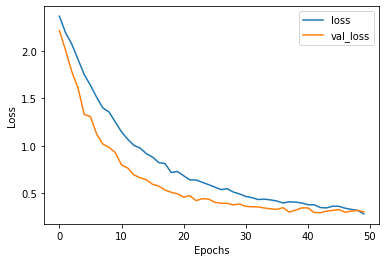

In [42]:
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

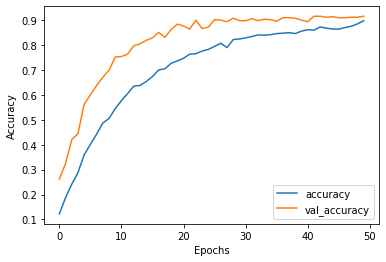

In [43]:
plt.plot(results.history["accuracy"], label="accuracy")
plt.plot(results.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [44]:
model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 14ms/step - loss: 0.3873 - accuracy: 0.8996


[0.38728809356689453, 0.8996062874794006]

In [47]:
label_to_str={0: "air_conditioner",
              1: "car_horn",
              2: "children_playing",
              3: "dog_bark",
              4: "drilling",
              5: "engine_idling",
              6: "gun_shot",
              7: "jackhammer",
              8: "siren",
              9: "street_music"}

In [51]:
tahmin=model.predict(X_test[1].reshape((1,100,100,1)))
tahmin_sinif=tahmin.argmax()
tahmin_yuzde=tahmin.max()

print("Gerçek: "+label_to_str[y_test[1]])
print("Tahmin: "+label_to_str[tahmin_sinif])
print("Olasilik Yuzde: "+str(tahmin_yuzde*100))

Gerçek: dog_bark
Tahmin: dog_bark
Olasilik Yuzde: 99.99054670333862
